In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00


In [3]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#https://www.youtube.com/watch?v=8FCDpFhd1zk

In [24]:
data = {'Date': ['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28', '2019-02-04','2019-02-11', '2019-02-18', '2019-02-25','2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25', '2019-04-01', '2019-04-07', '2019-04-14', '2019-04-21',
                 '2019-04-28', '2019-05-05', '2019-05-12','2019-05-19','2019-05-26','2019-06-02','2019-06-09','2019-06-16','2019-06-23','2019-06-30',
                 '2019-07-07','2019-07-14','2019-07-21','2019-07-28','2019-08-04','2019-08-11','2019-08-18','2019-08-25','2019-09-01','2019-09-08','2019-09-15','2019-09-22','2019-09-29','2019-10-06','2019-10-13','2019-10-20','2019-10-27','2019-11-03',
                 '2019-11-10','2019-11-17','2019-11-24','2019-12-01','2019-12-08','2019-12-15','2019-12-22','2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2019-01-26', '2020-02-02','2020-02-09', '2020-02-16', '2020-02-23',
                 '2020-03-01', '2020-03-08', '2020-03-15','2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
                 '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
                 '2020-10-04', '2020-10-11', '2020-10-18','2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
                 '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
                 '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
                 '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
                 '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'],
                      'Servers': [521, 1683, 2037, 974, 966, 1541, 1085, 1505, 1193, 1407, 878, 835, 593, 1184, 1265, 831, 686, 797, 1030, 1280, 1074, 618, 387, 446, 636, 548, 472, 863, 557, 904, 640, 655, 832, 606, 859,
                                  269, 839, 421, 400, 307, 535, 358, 467, 442, 324, 555, 490, 282, 357, 458, 359, 53, 142, 758,  521, 455, 438, 326, 403, 516, 443, 478, 305, 563, 340, 413, 675, 485, 180, 165, 143, 237, 295, 320, 439,
                                  448, 435, 140, 184, 326, 407, 533, 332, 244, 424, 439, 350, 226, 378, 308, 239, 303, 321, 416, 166, 357, 241, 412, 343, 90, 242, 373, 352, 181, 73, 279, 387, 523, 592, 342, 396, 1116, 375, 340, 395, 254,
                                  325, 215, 198, 405, 241, 190, 249, 201, 286, 282, 265, 185, 231, 188, 219, 217, 125, 314, 100, 216, 320, 179, 360, 167, 220, 261, 245, 245, 202, 461, 222, 189, 232, 210, 147, 47, 153, 120, 131, 57, 14]}



df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(157, 1)


,Servers
Date,
2019-01-01,521
2019-01-07,1683
2019-01-14,2037
2019-01-21,974
2019-01-28,966


<Axes: xlabel='Date'>

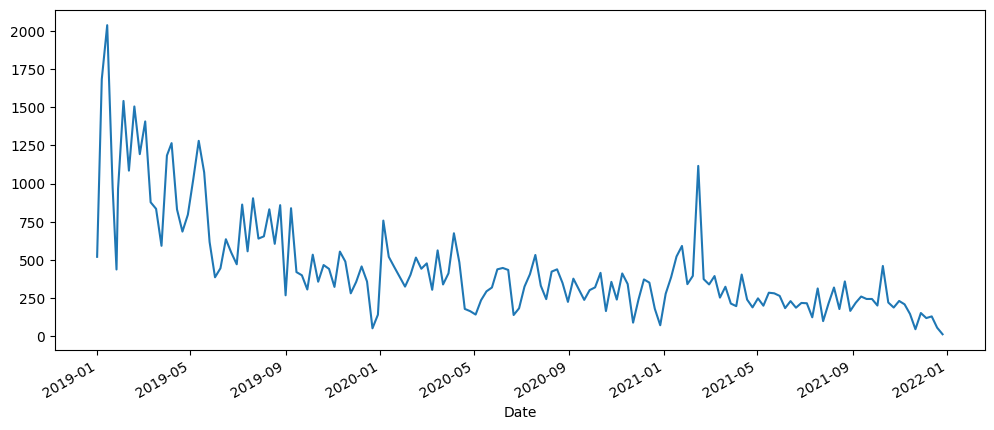

In [26]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot(figsize=(12,5))

In [29]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [31]:
ad_test(df['Servers'])

1. ADF :  -2.560024876561946
2. P-Value :  0.10154393214424173
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 152
5. Critical Values :
	 1% :  -3.474120870218417
	 5% :  -2.880749791423677
	 10% :  -2.5770126333102494


In [32]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [33]:
stepwise_fit = auto_arima(df['Servers'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2113.216, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2169.907, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2155.640, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2114.355, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2167.934, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2115.812, Time=1.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2111.425, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2114.462, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2135.379, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2112.925, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2121.342, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2113.626, Time=0.33 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.141 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1050.712
Date:                Thu, 08 Feb 2024   AIC                           2111.425
Time:                        19:25:23   BIC                           2126.674
Sample:                             0   HQIC                          2117.618
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.4271      4.616     -1.826      0.068     -17.474       0.620
ar.L1          0.0842      0.080      1.051      0.293      -0.073       0.241
ar.L2         -0.2258      0.066     -3.400      0.001      -0.356      -0.096
ma.L1         -0.7781      0.065    -12.011      0.000      -0.905      -0.651
sigma2      4.095e+04   2931.064     13.970      0.000    3.52e+04    4.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               105.73
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(157, 1)
(127, 1) (30, 1)


In [39]:
model=ARIMA(train['Servers'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Servers   No. Observations:                  127
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -861.481
Date:                Thu, 08 Feb 2024   AIC                           1730.963
Time:                        19:31:45   BIC                           1742.308
Sample:                             0   HQIC                          1735.572
                                - 127                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0768      0.106      0.722      0.471      -0.132       0.285
ar.L2         -0.2486      0.080     -3.123      0.002      -0.405      -0.093
ma.L1         -0.7257      0.097     -7.516      0.000      -0.915      -0.536
sigma2      5.014e+04   4435.057     11.305      0.000    4.14e+04    5.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                63.30
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2021-06-06    259.095208
2021-06-13    262.867601
2021-06-20    264.625208
2021-06-27    263.822452
2021-07-04    263.323875
2021-07-11    263.485132
2021-07-18    263.621457
2021-07-25    263.591843
2021-08-01    263.555679
2021-08-08    263.560264
2021-08-15    263.569605
2021-08-22    263.569183
2021-08-29    263.566829
2021-09-05    263.566753
2021-09-12    263.567332
2021-09-19    263.567396
2021-09-26    263.567256
2021-10-03    263.567230
2021-10-10    263.567263
2021-10-17    263.567272
2021-10-24    263.567264
2021-10-31    263.567261
2021-11-07    263.567263
2021-11-14    263.567264
2021-11-21    263.567263
2021-11-28    263.567263
2021-12-05    263.567263
2021-12-12    263.567263
2021-12-19    263.567263
2021-12-26    263.567263
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

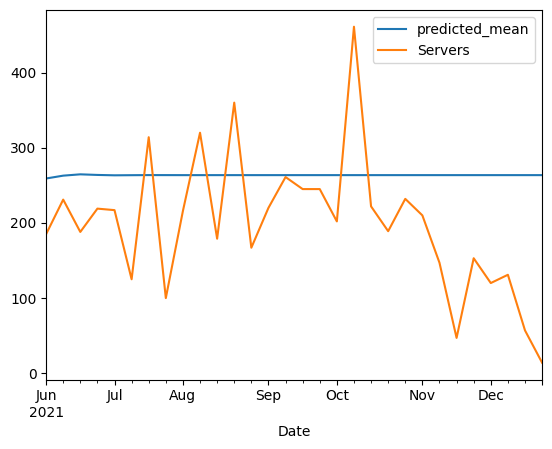

In [42]:
pred.plot(legend=True)
test['Servers'].plot(legend=True)

In [43]:
test['Servers'].mean()

199.23333333333332

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Servers']))
print(rmse)

110.84611409332238
